# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [146]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [147]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [148]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [149]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [150]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/G0PqMIEUMV', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094332044052549633'}], 'symbols': []}",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",True,"{'default_profile': False, 'protected': False, 'follow_request_sent': None, 'is_translator': False, 'profile_use_background_image': False, 'name': 'Rob Oakeshott', 'profile_background_tile': False, 'friends_count': 4161, 'following': None, 'id_str': '16777464', 'profile_link_color': 'ABB8C2', 'listed_count': 636, 'translator_type': 'none', 'utc_offset': None, 'id': 16777464, 'is_translation_enabled': False, 'description': 'Independent candidate for Cowper. Lismore born Port Macquarie resident. Former state and federal MP. Views own. #Oakey4Cowper', '..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [88, 111], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, 'in_reply_to_screen_name': None, 'retweet_count': 734, 'possibly_sensitive': False, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'id_str': '1093998640392220673', 'entities': {'hashtags': [], 'user_mentions': [{'id_str': '958196173', 'name': ""Unist'ot'en Camp"", 'screen_name': 'UnistotenCamp', 'indices': [47, 61], 'id': 958196173}], 'urls': [{'indices': [116, 139], 'url': 'https://t.co/qeZKIWWIur', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/s...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,False,"{'default_profile': False, 'protected': False, 'follow_request_sent': None, 'is_translator': False, 'profile_use_background_image': False, 'name': 'Suze Michelini', 'profile_background_tile': False, 'friends_count': 15565, 'following': None, 'id_str': '850130990706151428', 'profile_link_color': '1B95E0', 'listed_count': 62, 'translator_type': 'none', 'utc_offset': None, 'id': 850130990706151428, 'is_translation_enabled': False, 'description': 'AI Tech inventor for autistic children,brain injuries Snowboarder,lesbian, Libertarian, Proud Aspie,PhD in A..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/2asxrk5Fqd', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094379028608438272'}], 'symbols': []}",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'in_reply_to_screen_name': None, 'retweet_count': 118, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'id_str': '1093931686998487040', 'entities': {'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/zQRo40WzF8', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1093931686998487040'}], 'symbols': []}, 'place': None, 'coordina

In [151]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>","RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change

Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [152]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [153]:
climate_feed_df.replace('None', np.nan, inplace = True)
climate_feed_df.sample(n=10)


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
9583,NaN,NaN,Sat Feb 09 21:05:46 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '803694179079458816', 'name': 'Kamala Harris', 'screen_name': 'SenKamalaHarris', 'indices': [3, 19], 'id': 803694179079458816}], 'urls': [], 'symbols': []}",NaN,0,False,NaN,1094341611490820104,1094341611490820104,...,NaN,NaN,NaN,1646,False,1.093564e+18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @SenKamalaHarris: We must urgently address the climate change crisis before it’s too late. I am proud to be an original co-sponsor of a…,False,34878201
5473,NaN,NaN,Sat Feb 09 22:27:00 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '4018919237', 'name': 'Sarah Godlewski', 'screen_name': 'SarahforWI', 'indices': [3, 14], 'id': 4018919237}], 'urls': [], 'symbols': []}",NaN,0,False,NaN,1094362053467361281,1094362053467361281,...,NaN,NaN,NaN,18,False,1.094345e+18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @SarahforWI: “We will no longer ignore climate change when managing school trust investments. We have a fiduciary responsibility to Wisc…,False,47361008
6133,NaN,NaN,Sat Feb 09 22:13:49 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '867947619661881344', 'name': 'Dan Siddons\U0001f91d', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}], 'urls': [], 'symbols': []}",NaN,0,False,NaN,1094358737026981893,1094358737026981893,...,NaN,NaN,NaN,350,False,1.094335e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…,False,3518486666
7561,NaN,NaN,Sat Feb 09 21:45:15 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '6044272', 'name': 'Ramez Naam', 'screen_name': 'ramez', 'indices': [3, 9], 'id': 6044272}, {'id_str': '281877818', 'name': 'Noah Smith', 'screen_name': 'Noahpinion', 'indices': [14, 25], 'id': 281877818}], 'urls': [], 'symbols': []}",NaN,0,False,NaN,1094351545200652289,1094351545200652289,...,NaN,NaN,NaN,30,False,1.094133e+18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @ramez: As @Noahpinion has been pointing out, the US produces only 15% of carbon emissions. US decarbonization is necessary, but not suf…",False,30375115
6434,NaN,NaN,Sat Feb 09 22:07:31 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [74, 97], 'url': 'https://t.co/3UvFUD5O2f', 'display_url': 'cbc.ca/news/technolog…', 'expanded_url': 'https://www.cbc.ca/news/technology/climate-change-ice-loss-1.5001167'}], 'symbols': []}",NaN,1,False,NaN,1094357151357775872,1094357151357775872,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",No more shinny? Thousands of lakes are losing their winter ice | CBC News https://t.co/3UvFUD5O2f,False,17663345
455,NaN,NaN,Sun Feb 10 00:08:10 +0000 2019,"{'hashtags': [{'indices': [102, 118], 'text': 'climateheritage'}], 'user_mentions': [{'id_str': '1006218078970175489', 'name': 'ClimateHeritage', 'screen_name': 'ClimateHeritage', 'indices': [3, 19], 'id': 1006218078970175489}, {'id_str': '30929600', 'name': 'Energy and Commerce Committee', 'screen_name': 'EnergyCommerce', 'indices': [42, 57], 'id': 30929600}, {'id_str': '28356911', 'name': 'Gullah/Geechee Folks', 'screen_name': 'GullahGeechee', 'indices': [124, 138], 'id': 28356911}], 'urls': [], 'symbols': []}",NaN,0,False,NaN,1094387512116678656,1094387512116678656,...,NaN,1092790162222919681,1092790162222919681,9,False,1.093516e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @ClimateHeritage: Witnesses at today’s @E

Working with only selected attributes.

In [154]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [155]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
3146,Sat Feb 09 23:17:38 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [116, 139], 'url': 'https://t.co/Z9mCSFqTiI', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094374795477692416'}], 'symbols': []}",NaN,True,925199616194334720,True economists will start to realize that profits the way we generate them and destroy the environment and change… https://t.co/Z9mCSFqTiI
7450,Sat Feb 09 21:47:22 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '632704303', 'name': 'Tiana Lowe', 'screen_name': 'TianaTheFirst', 'indices': [3, 17], 'id': 632704303}], 'urls': [], 'symbols': []}",1.094351e+18,False,525862144,"RT @TianaTheFirst: ""I'm a champion of the TSA, so let's abolish the DHS!""\n\n""Abolish ICE!""\n\n""Federal jobs guarantees to fight climate change…"
9605,Sat Feb 09 21:05:12 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}",1.094303e+18,False,2233635295,RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
4610,Sat Feb 09 22:45:39 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '803694179079458816', 'name': 'Kamala Harris', 'screen_name': 'SenKamalaHarris', 'indices': [3, 19], 'id': 803694179079458816}], 'urls': [], 'symbols': []}",1.093564e+18,False,801425597054517250,RT @SenKamalaHarris: We must urgently address the climate change crisis before it’s too late. I am proud to be an original co-sponsor of a…
9763,Sat Feb 09 21:02:13 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '30354991', 'name': 'Kamala Harris', 'screen_name': 'KamalaHarris', 'indices': [3, 16], 'id': 30354991}, {'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'screen_name': 'AOC', 'indices': [42, 46], 'id': 138203134}, {'id_str': '1129029661', 'name': 'Ed Markey', 'screen_name': 'EdMarkey', 'indices': [51, 60], 'id': 1129029661}], 'urls': [], 'symbols': []}",1.093573e+18,False,817070709935669248,RT @KamalaHarris: I’m proud to co-sponsor @AOC and @EdMarkey's Green New Deal. We must aggressively tackle climate change which poses an ex…
3396,Sat Feb 09 23:12:06 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '974809558173417472', 'name': 'Martin Gibson', 'screen_name': 'MartinG64208450', 'indices': [3, 19], 'id': 974809558173417472}, {'id_str': '725531612100759553', 'name': 'Jarred', 'screen_name': 'Jarrred___', 'indices': [21, 32], 'id': 725531612100759553}], 'urls': [], 'symbols': []}",1.094314e+18,False,1032916708028121088,RT @MartinG64208450: @Jarrred___ It’s pretty pointless arguing with non-scientists about climate change; their knowledge is superficial &amp; t…
3073,Sat Feb 09 23:19:25 +0000 2019,"{'hashtags': [{'indices': [41, 48], 'text': 'Nature'}], 'user_mentions': [{'id_str': '227586466', 'name': 'Quinn Emmett', 'screen_name': 'quinnemmett', 'indices': [0, 12], 'id': 227586466}], 'urls': [], 'symbols': []}",NaN,False,94405987,@quinnemmett There is no climate change. #Nature
899,Sat Feb 09 23:59:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '65497475', 'name': 'Eugene Gu, MD', 'screen_name': 'eugenegu', 'indices': [3, 12], 'id': 65497475}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [14, 30], 'id': 25073877}], 'urls': [], 'symbols': []}",1.094379e+18,False,860310080947982336,RT @eugenegu: @realDonaldTrump And FYI climate change is real despite Trump’s constant denials. It’s not that he isn’t smart enough to know…
3285,Sat Feb 09 23:14:21 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '429531188', 'name': 'Teri Kanefield', 'screen_name': 'Teri_Kanefield', 'indices': [3, 18], 'id': 429531188}], 'urls': [], 'symbols': []}",1.094287e+18,False,1103850667,"RT @Teri_Kanefie

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [156]:
climate_feed_df["created_at"] = pd.to_datetime(climate_feed_df["created_at"])
climate_feed_df = climate_feed_df.astype({"truncated": bool})

Checking datatype again

In [157]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [158]:
nan_count = climate_feed_df.isna().sum()
print(nan_count)

created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64


We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [159]:
import ast

hashtags = []
user_mentions = []

for i, row in climate_feed_df.iterrows():
    entities = ast.literal_eval(row['entities'])
    hashtags.append(','.join([t['text'] for t in entities['hashtags']]))
    user_mentions.append(','.join(t['name'] for t in entities['user_mentions']))
    
climate_feed_df['hashtags'] = hashtags
climate_feed_df['user_mentions'] = user_mentions

climate_feed_df[["entities", "hashtags","user_mentions"]]

,entities,hashtags,user_mentions
0,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",,Steve King
1,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",,Rob Oakeshott
2,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",,Suze Michelini
3,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",,Chad Vigorous
4,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",,Ken Klippenstein
...,...,...,...
9994,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change.html'}], 'symbols': []}",,fromhello2hello
9995,"{'hashtags': [], 'user_mentions': [{'id_str': '1082006962995429383', 'name': 'stuntdaddy_42', 'screen_name': 'stuntdaddy_42', 'indices': [3, 17], 'id': 1082006962995429383}, {'id_str': '2497547378', 'name': 'Justice Faurall', 'screen_name': 'JFaurall', 'indices': [19, 28], 'id': 2497547378}, {'id_str': '3073664870', 'name': 'Michael Shelton', 'screen_name': 'MgBenchjeweler', 'indices': [29, 44], 'id': 3073664870}, {'id_str': '15764644', 'name': 'Nancy Pelosi', 'screen_name': 'SpeakerPelosi', 'indices': [45, 59], 'id': 15764644}], 'urls': [], 'symbols...",,"stuntdaddy_42,Justice Faurall,Michael Shelton,Nancy Pelosi"
9996,"{'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}",,Bernie Sanders
9997,"{'hashtags': [], 'user_mentions': [{'id_str': '637196658', 'name': 'Kate Aronoff', 'screen_name': 'KateAronoff', 'indices': [3, 15], 'id': 637196658}], 'urls': [{'indices': [73, 96], 'url': 'https://t.co/P6znQNsbLH', 'display_url': 'twitter.com/business/statu…', 'expanded_url': 'https://twitter.com/business/status/1093893115633647616'}], 'symbols': []}",,Kate Aronoff


# Cleaning tweets

Let's see some random tweets

In [160]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

752                       @AllanMargolin @ClimateCentral @EaterSouls @somethingesau @SolarHeadofST @HanSoloResists @StarWarsResists… https://t.co/gh7h7I1VeY
2285             RT @susan_ruffo_oc: Climate change doesn't get more real than this.  It is affecting the ocean and everyone who depends on and cares about…
3081          RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
8367            RT @SteveSGoddard: “No matter if the science of global warming is all phony… climate change provides the greatest opportunity to bring abou…
8062    RT @sydney__watson: Australia, Britain &amp; Canada are demonstrating how insane socialist, social justice, immigration &amp; climate change polici…
                                                                                ...                                                                         
6574            RT @ProfTimStephens: “more than anyone els

**Example of tweet not truncated**

In [161]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [162]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [163]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [164]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [165]:
import pickle
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408


In [166]:
for i, row in climate_feed_df.iterrows():
    text=row['original_tweet_text']
    if text:
        text = re.sub(r"(\n)+",".", text) #remove \n
        text = re.sub(r"http",".", text) #remove HTTP
        text = re.sub(r"https",".", text) #remove https
        text = re.sub(r"@[a-zA-Z]+",".", text) #remove usernames
        climate_feed_df['original_tweet_text'].iloc[i] = text

climate_feed_df['original_tweet_text'].sample(n=15)

C:\Users\kmind\anaconda3\envs\dstools1\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


3454    I believe that everyone in the world deserves health care. I also believe that college should be debt free everywhe… .s://t.co/UJJD9uhRLc
7056                                                                                                                                         None
7168     President Trump believes we should listen to fossil fuel executives and ignore climate change. .I believe we shoul… .s://t.co/2ewlaPQscF
9584                                                                                                                                         None
8039                                                                                                                                         None
6000    God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate cha… .s://t.co/1At7Gym23L
3554                 With the highest fire risk counties in CA, . said of climate change: “Before we run screaming into the…

# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [167]:

for i, row in climate_feed_df.iterrows():
    text=row['text']
    if text:
        text = re.sub(r"\n",".", text) #remove \n
        text = re.sub(r"\n\n",".", text) #remove \n\n
        text = re.sub(r'@\w+:? ?','', text) #remove usernames
        text = re.sub(r"http",".", text) #remove http
        text = re.sub(r"https",".", text) #remove https
        text = re.sub(r'RT','', text) #remove retweets
        climate_feed_df['text'].iloc[i] = text

climate_feed_df['text'].sample(n=15)

182                                                👏Elon Musk has released all of Tesla patents to help fight climate change .s://t.co/ZgIUvYvECy
8371                              What would Minnesota be without winter? Without forests? Thanks for giving this very real threat the sustained…
5702                                                                                        Give it up fossils. It's over. ...s://t.co/wZ5Gymi9CI
6417                   This is the crisis that we need to address as a nation. It’s mental health, not climate change, that will be the death us…
4673                                                                                                                   Climate change is a killer
8070                                   More than half the world's oceans will change color by 2100 because of climate change .s://t.co/ekgNKytMA1
5731                                Doesnt matter Dems don’t care, they don’t care about women, babies, sexual assault, lawl

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [168]:
climate_feed_df['final_tweet_text'] = np.nan

for i, row in climate_feed_df.iterrows():
    ogtext = row['original_tweet_text']
    newtext = row['text']
    if ogtext == None:
        climate_feed_df['final_tweet_text'].iloc[i] = newtext
    else:
        climate_feed_df['final_tweet_text'].iloc[i] = ogtext

climate_feed_df


,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… .s://t.co/J1CcrQZkB2,None,Steve King,None,None,.says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… .s://t.co/J1CcrQZkB2
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… .s://t.co/G0PqMIEUMV",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… .s://t.co/G0PqMIEUMV"
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thought.The southern Alberta chinook was climate change lol. .s://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought.The southern Alberta chinook was climate change lol. .s://t.co/HWjCJGhQIx,1094384528267902977,This is the same idiot who thought.The southern Alberta chinook was climate change lol. .s://t.co/HWjCJGhQIx
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… .s://t.co/2asxrk5Fqd",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… .s://t.co/2asxrk5Fqd"
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… .s://t.co/1J7lLUkYyY,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… .s://t.co/1J7lLUkYyY
...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 

# Emoji detection

See this example of emoji as unicode characters

In [169]:
climate_feed_df['final_tweet_text'].loc[3931]

'Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [170]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [171]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [172]:
! pip install emoji

In [173]:
import emoji

In [174]:
emoji.UNICODE_EMOJI

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰️': ':A_button_(blood_type):',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱️': ':B_button_(blood_type):',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botsw

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [180]:
from emoji.unicode_codes import UNICODE_EMOJI
from nltk.tokenize.casual import TweetTokenizer

emoji_regex2 = re.compile(
"["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+")

emojis_list = []
for i, row in climate_feed_df.iterrows():
    textrow = row['final_tweet_text']
    emojis_list.append(emoji_regex2.findall(climate_feed_df['final_tweet_text'].iloc[i]))

climate_feed_df['emojis'] = pd.Series(emojis_list)

climate_feed_df['emojis'].sample(n=20)

9843    []
4268    []
7845    []
2312    []
4102    []
6655    []
967     []
9737    []
5087    []
6423    []
3849    []
7716    []
8073    []
7305    []
3180    []
9105    []
6415    []
1040    []
3692    []
2939    []
Name: emojis, dtype: object

# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [117]:
!pip install wordcloud

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

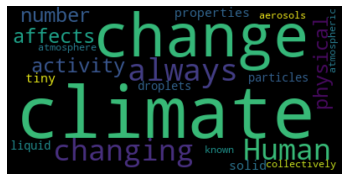

In [120]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

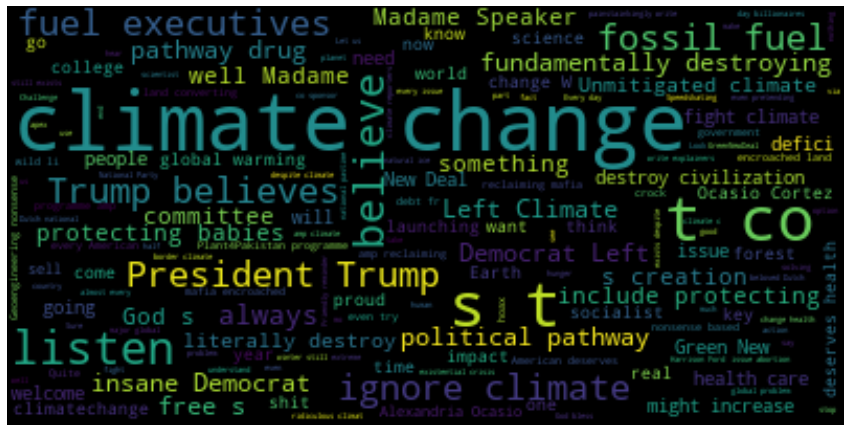

In [121]:
from wordcloud import STOPWORDS
import contractions
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text = " ".join(i for i in climate_feed_df.text)

#Fix contractions
new_word = contractions.fix(text)
#Lemmatize
lem_word = lemmatizer.lemmatize(new_word)

#Wordcloud with removed stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(lem_word)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [99]:
import enchant

ModuleNotFoundError: No module named 'enchant'

In [ ]:
dictionary = enchant.Dict('en')

In [ ]:
climate_feed_df['text'].loc[5217]

In [ ]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]